In [15]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [17]:
%%R

require('tidyverse')
require('ggrepel')
require('ggpubr')
require('broom')
require('AICcmodavg')

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 1.0.0 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


R[write to console]: Loading required package: ggrepel

R[write to console]: Loading required package: ggpubr

R[write to console]: Loading required package: broom

R[write to console]: Loading required package: AICcmodavg



In [2]:
df = pd.read_csv('data_cleaned_long.csv')
df

,year,borough,zip,complaints,pop,complaints_norm,median_income,pct_below_poverty,pct_white,pct_black_or_african_american,pct_american_indian_or_alaska_native,pct_asian,pct_native_hawaiian_and_other_pacific_islande,pct_hispanic_or_latino
0,2020,MANHATTAN,10001,289,25026,1154.799009,96787,11.644505,63.454008,6.469272,0.043954,20.782386,0.251738,15.683689
1,2020,MANHATTAN,10002,1067,74363,1434.853354,35607,28.863569,31.701249,8.935896,0.958810,41.875664,0.000000,25.758778
2,2020,MANHATTAN,10003,824,54671,1507.197600,129981,7.623817,73.075305,5.046551,0.204862,15.079292,0.126210,8.655411
3,2020,MANHATTAN,10004,8,3310,241.691843,204949,2.469813,68.247734,4.833837,0.000000,20.362538,0.362538,5.830816
4,2020,MANHATTAN,10005,3,8664,34.626039,184681,6.194881,73.014774,2.008310,0.000000,17.474608,0.000000,6.105725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,2022,QUEENS,11436,173,21248,814.194277,78306,10.440875,3.223833,60.744541,0.597703,7.840738,0.000000,13.563630
535,2022,QUEENS,11691,1619,70797,2286.820063,54877,24.772854,32.709013,44.333799,0.309335,4.305267,0.053675,24.577313
536,2022,QUEENS,11692,470,24639,1907.544949,53498,18.406970,19.814116,56.000649,0.190754,5.710459,0.000000,24.692561
537,2022,QUEENS,11693,146,14147,1032.020923,64688,14.837360,60.168234,21.948116,0.275677,2.933484,0.000000,29.744822


In [3]:
df.dtypes

year                                               int64
borough                                           object
zip                                                int64
complaints                                         int64
pop                                                int64
complaints_norm                                  float64
median_income                                      int64
pct_below_poverty                                float64
pct_white                                        float64
pct_black_or_african_american                    float64
pct_american_indian_or_alaska_native             float64
pct_asian                                        float64
pct_native_hawaiian_and_other_pacific_islande    float64
pct_hispanic_or_latino                           float64
dtype: object

In [6]:
# round off the values to 2 decimal places

df['pct_below_poverty'] = df['pct_below_poverty'].round(2)
df['pct_white'] = df['pct_white'].round(2)
df['pct_black_or_african_american'] = df['pct_black_or_african_american'].round(2)
df['pct_american_indian_or_alaska_native'] = df['pct_american_indian_or_alaska_native'].round(2)
df['pct_asian'] = df['pct_asian'].round(2)
df['pct_native_hawaiian_and_other_pacific_islande'] = df['pct_native_hawaiian_and_other_pacific_islande'].round(2)
df['pct_hispanic_or_latino'] = df['pct_hispanic_or_latino'].round(2)
df


,year,borough,zip,complaints,pop,complaints_norm,median_income,pct_below_poverty,pct_white,pct_black_or_african_american,pct_american_indian_or_alaska_native,pct_asian,pct_native_hawaiian_and_other_pacific_islande,pct_hispanic_or_latino
0,2020,MANHATTAN,10001,289,25026,1154.799009,96787,11.64,63.45,6.47,0.04,20.78,0.25,15.68
1,2020,MANHATTAN,10002,1067,74363,1434.853354,35607,28.86,31.70,8.94,0.96,41.88,0.00,25.76
2,2020,MANHATTAN,10003,824,54671,1507.197600,129981,7.62,73.08,5.05,0.20,15.08,0.13,8.66
3,2020,MANHATTAN,10004,8,3310,241.691843,204949,2.47,68.25,4.83,0.00,20.36,0.36,5.83
4,2020,MANHATTAN,10005,3,8664,34.626039,184681,6.19,73.01,2.01,0.00,17.47,0.00,6.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,2022,QUEENS,11436,173,21248,814.194277,78306,10.44,3.22,60.74,0.60,7.84,0.00,13.56
535,2022,QUEENS,11691,1619,70797,2286.820063,54877,24.77,32.71,44.33,0.31,4.31,0.05,24.58
536,2022,QUEENS,11692,470,24639,1907.544949,53498,18.41,19.81,56.00,0.19,5.71,0.00,24.69
537,2022,QUEENS,11693,146,14147,1032.020923,64688,14.84,60.17,21.95,0.28,2.93,0.00,29.74


In [20]:
df['complaints_norm'] = df['complaints_norm'].astype(int)

In [21]:
df = df.rename(columns={'pct_native_hawaiian_and_other_pacific_islande': 'pct_native_hawaiian_and_other_pacific_islander'})
df

,year,borough,zip,complaints,pop,complaints_norm,median_income,pct_below_poverty,pct_white,pct_black_or_african_american,pct_american_indian_or_alaska_native,pct_asian,pct_native_hawaiian_and_other_pacific_islander,pct_hispanic_or_latino
0,2020,MANHATTAN,10001,289,25026,1154,96787,11.64,63.45,6.47,0.04,20.78,0.25,15.68
1,2020,MANHATTAN,10002,1067,74363,1434,35607,28.86,31.70,8.94,0.96,41.88,0.00,25.76
2,2020,MANHATTAN,10003,824,54671,1507,129981,7.62,73.08,5.05,0.20,15.08,0.13,8.66
3,2020,MANHATTAN,10004,8,3310,241,204949,2.47,68.25,4.83,0.00,20.36,0.36,5.83
4,2020,MANHATTAN,10005,3,8664,34,184681,6.19,73.01,2.01,0.00,17.47,0.00,6.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,2022,QUEENS,11436,173,21248,814,78306,10.44,3.22,60.74,0.60,7.84,0.00,13.56
535,2022,QUEENS,11691,1619,70797,2286,54877,24.77,32.71,44.33,0.31,4.31,0.05,24.58
536,2022,QUEENS,11692,470,24639,1907,53498,18.41,19.81,56.00,0.19,5.71,0.00,24.69
537,2022,QUEENS,11693,146,14147,1032,64688,14.84,60.17,21.95,0.28,2.93,0.00,29.74


In [13]:
# remove the rows with missing values (racial data unavailable for zip code 11249 in Brooklyn)

df = df.dropna()
df

,year,borough,zip,complaints,pop,complaints_norm,median_income,pct_below_poverty,pct_white,pct_black_or_african_american,pct_american_indian_or_alaska_native,pct_asian,pct_native_hawaiian_and_other_pacific_islander,pct_hispanic_or_latino
0,2020,MANHATTAN,10001,289,25026,1154.799009,96787,11.64,63.45,6.47,0.04,20.78,0.25,15.68
1,2020,MANHATTAN,10002,1067,74363,1434.853354,35607,28.86,31.70,8.94,0.96,41.88,0.00,25.76
2,2020,MANHATTAN,10003,824,54671,1507.197600,129981,7.62,73.08,5.05,0.20,15.08,0.13,8.66
3,2020,MANHATTAN,10004,8,3310,241.691843,204949,2.47,68.25,4.83,0.00,20.36,0.36,5.83
4,2020,MANHATTAN,10005,3,8664,34.626039,184681,6.19,73.01,2.01,0.00,17.47,0.00,6.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,2022,QUEENS,11436,173,21248,814.194277,78306,10.44,3.22,60.74,0.60,7.84,0.00,13.56
535,2022,QUEENS,11691,1619,70797,2286.820063,54877,24.77,32.71,44.33,0.31,4.31,0.05,24.58
536,2022,QUEENS,11692,470,24639,1907.544949,53498,18.41,19.81,56.00,0.19,5.71,0.00,24.69
537,2022,QUEENS,11693,146,14147,1032.020923,64688,14.84,60.17,21.95,0.28,2.93,0.00,29.74


## What is in the dataframe?

This is a dataframe of 311 complaints related to heat and hot in the city of New York registered from 2020 to 2022. The data has been downloaded from the [NYC Open Data Portal](https://opendata.cityofnewyork.us/) and merged with US census data by zip code.


| Columns  | Explanation |
| ------------- | ------------- |
| year  | The year when the complaint was filed  |
| borough  | NYC borough |
| zip  | Zip code |
| complaints | Number of complaints (raw number) |
| pop | Population of the zip code |
| complaints_norm | Complaints per 100,000 people in the zip code |
| median_income | Median income of the zip code (in USD) |
| pct_below_poverty | Percentage of people below poverty line in the zip code |
| pct_white | Percentage of white people in the zip code |
| pct_black_or_african_american	| Percentage of black or african american people in the zip code |
| pct_american_indian_or_alaska_native	| Percentage of american indian or alaska native people in the zip code |
| pct_asian | Percentage of asian people in the zip code |
| pct_native_hawaiian_and_other_pacific_islander | Percentage of native hawaiian and other pacific islander people in the zip code |
| pct_hispanic_or_latino | Percentage of hispanic or latino people in the zip code |


## Statistical analysis

Journalistic inquiry: What is the relationship between the number of heat and hot water complaints and the median income/ pct_below_poverty and racial demographics of the zip code?



#### First hypothesis

There is no relationship between the number of heat and hot water complaints and the median income of the zip code.

`geom_smooth()` using formula = 'y ~ x'


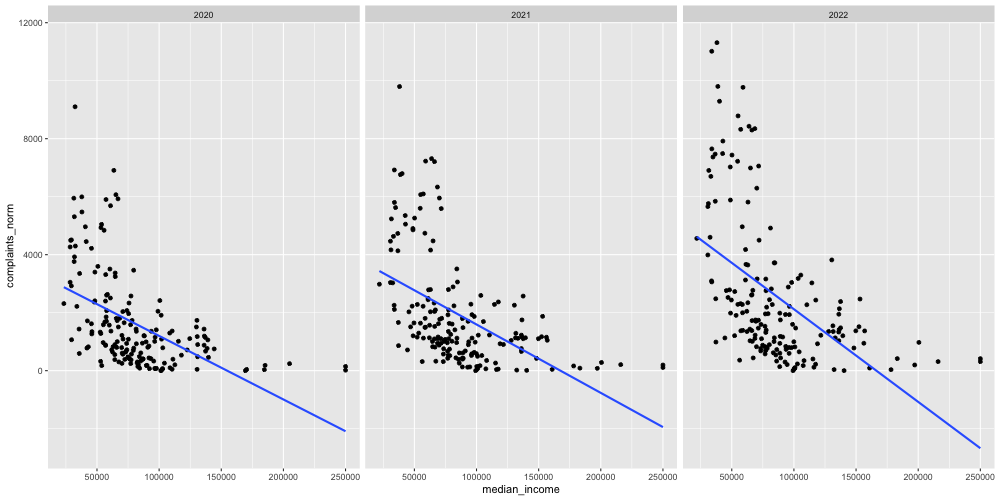

In [18]:
%%R -i df -w 1000 -h 500

ggplot(df, aes(x = median_income, y = complaints_norm)) +
    facet_wrap(~year) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE)

In [19]:
%%R -i df

model <- lm(complaints_norm ~ median_income, data=df)
summary(model)



Call:
lm(formula = complaints_norm ~ median_income, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2678.5 -1362.2  -542.8   778.5  8098.7 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    4.181e+03  1.864e+02   22.43   <2e-16 ***
median_income -2.544e-02  2.001e-03  -12.71   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1837 on 535 degrees of freedom
Multiple R-squared:  0.232,	Adjusted R-squared:  0.2306 
F-statistic: 161.6 on 1 and 535 DF,  p-value: < 2.2e-16



The p-value is really small, so the variance in complaints_norm is not due to chance alone. We can reject the null hypothesis. There is a relationship between the number of heat and hot water complaints and the median income of the zip code however, this model only explains about 23% of the variance in complaints_norm.. 

#### Second hypothesis

There is no relationship between the number of heat and hot water complaints and the pct_below_poverty in a zip code.

`geom_smooth()` using formula = 'y ~ x'


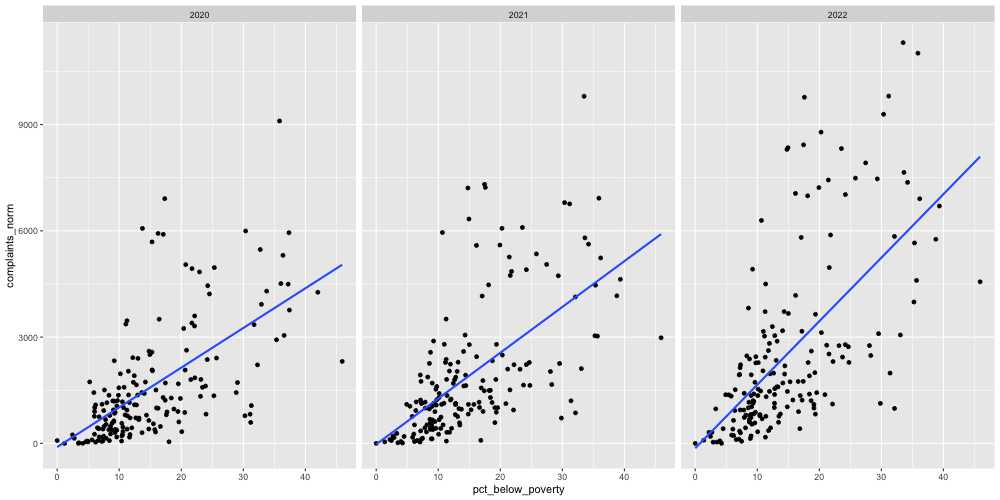

In [22]:
%%R -i df -w 1000 -h 500

ggplot(df, aes(x = pct_below_poverty, y = complaints_norm)) +
    facet_wrap(~year) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE)

In [24]:
%%R -i df

model <- lm(complaints_norm ~ pct_below_poverty, data=df)
summary(model)


Call:
lm(formula = complaints_norm ~ pct_below_poverty, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4007.4  -938.2  -363.2   480.7  7398.7 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -77.928    142.826  -0.546    0.586    
pct_below_poverty  139.297      8.108  17.181   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1682 on 535 degrees of freedom
Multiple R-squared:  0.3556,	Adjusted R-squared:  0.3544 
F-statistic: 295.2 on 1 and 535 DF,  p-value: < 2.2e-16



While there was negative correlation between complaints_norm and median_income (more the median income, less complaints_norm), there is a positive correlation between pct_below_poverty. 

In this case too, the p-value is small so we can reject the null hypothesis. There is a relationship between the number of heat and hot water complaints and the pct_below_poverty in a zip code and, this model explains over a third of the variance in complaints_norm. It is a better model than the first one.

### Third hypothesis

There is no relationship between the number of heat and hot water complaints and the racial demographics of a zip code.

`geom_smooth()` using formula = 'y ~ x'


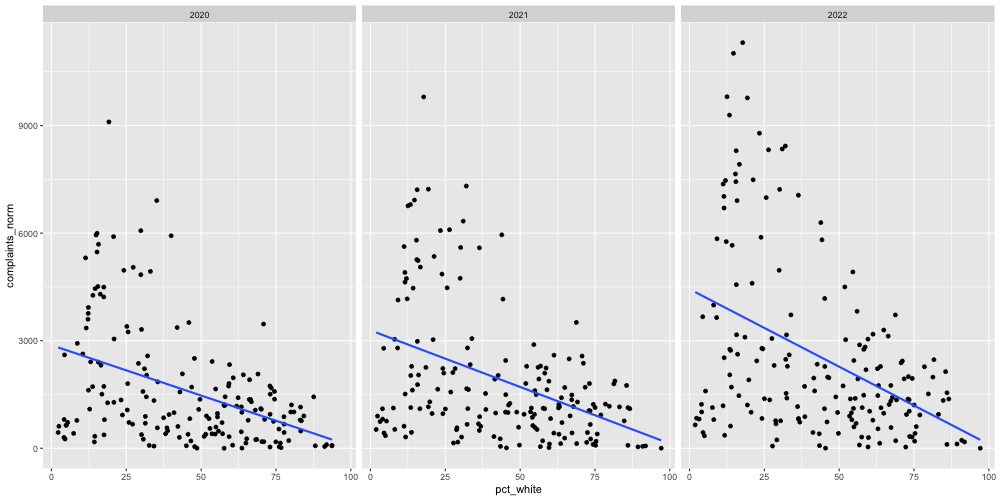

In [25]:
%%R -i df -w 1000 -h 500

ggplot(df, aes(x = pct_white, y = complaints_norm)) +
    facet_wrap(~year) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE)

In [26]:
%%R -i df

model <- lm(complaints_norm ~ pct_white, data=df)
summary(model)


Call:
lm(formula = complaints_norm ~ pct_white, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3135.2 -1219.3  -336.5   713.0  8376.1 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3550.413    167.122   21.24   <2e-16 ***
pct_white    -34.636      3.323  -10.42   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1911 on 535 degrees of freedom
Multiple R-squared:  0.1688,	Adjusted R-squared:  0.1672 
F-statistic: 108.6 on 1 and 535 DF,  p-value: < 2.2e-16



`geom_smooth()` using formula = 'y ~ x'


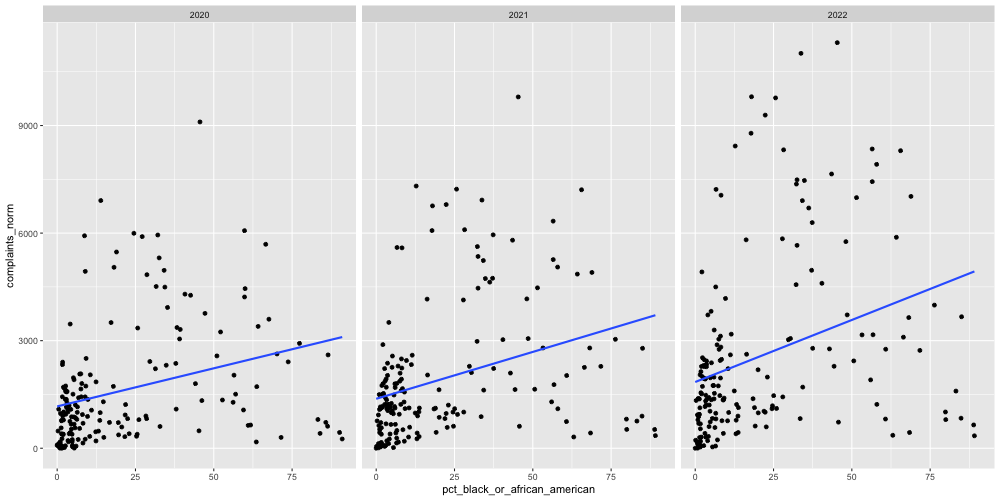

In [27]:
%%R -i df -w 1000 -h 500

ggplot(df, aes(x = pct_black_or_african_american, y = complaints_norm)) +
    facet_wrap(~year) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE)

In [28]:
%%R -i df

model <- lm(complaints_norm ~ pct_black_or_african_american, data=df)
summary(model)


Call:
lm(formula = complaints_norm ~ pct_black_or_african_american, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3680.0 -1248.9  -488.8   468.5  8630.2 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   1467.133    115.079   12.75  < 2e-16 ***
pct_black_or_african_american   27.152      3.649    7.44 4.03e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1995 on 535 degrees of freedom
Multiple R-squared:  0.09377,	Adjusted R-squared:  0.09207 
F-statistic: 55.36 on 1 and 535 DF,  p-value: 4.032e-13



`geom_smooth()` using formula = 'y ~ x'


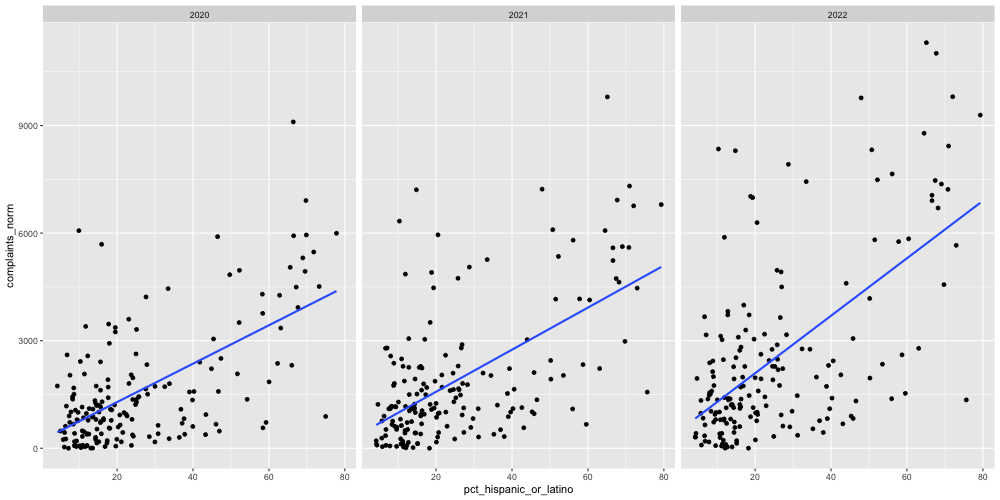

In [29]:
%%R -i df -w 1000 -h 500

ggplot(df, aes(x = pct_hispanic_or_latino, y = complaints_norm)) +
    facet_wrap(~year) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE)


In [30]:
%%R -i df

model <- lm(complaints_norm ~ pct_hispanic_or_latino, data=df)
summary(model)


Call:
lm(formula = complaints_norm ~ pct_hispanic_or_latino, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4286.0  -980.2  -306.9   612.3  7315.1 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)              367.87     124.38   2.958  0.00324 ** 
pct_hispanic_or_latino    64.12       3.86  16.612  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1702 on 535 degrees of freedom
Multiple R-squared:  0.3403,	Adjusted R-squared:  0.339 
F-statistic: 275.9 on 1 and 535 DF,  p-value: < 2.2e-16



There seems be to a better correlation between complaints_norm and pct_white and pct_hispanic_or_latino than pct_black_or_african_american. 

### Borough-wise analysis


#### Bronx  

`geom_smooth()` using formula = 'y ~ x'


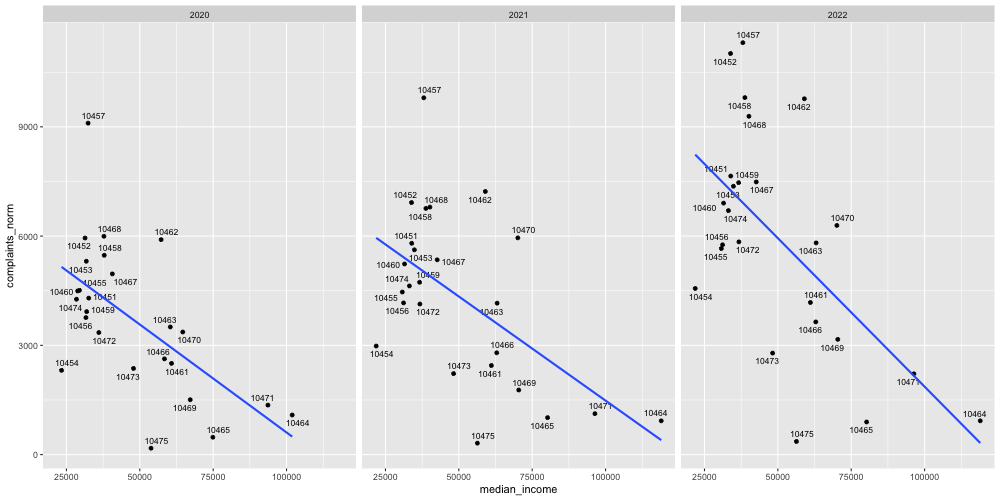

In [31]:
%%R -i df -w 1000 -h 500

df %>%
    filter(borough == 'BRONX') %>%
    ggplot(aes(x = median_income, y = complaints_norm)) +
    # label points with zip code
    geom_text_repel(aes(label = zip), size = 3) +
    facet_wrap(~year) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE)



In [33]:
%%R -i df

df_bronx <- df %>%
    filter(borough=='BRONX')

model <- lm(complaints_norm ~ median_income, data=df_bronx)
summary(model)


Call:
lm(formula = complaints_norm ~ median_income, data = df_bronx)

Residuals:
    Min      1Q  Median      3Q     Max 
-4192.3 -1503.3  -190.7  1188.5  5931.8 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7824.34423  647.66195  12.081  < 2e-16 ***
median_income   -0.06424    0.01189  -5.403 7.84e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2270 on 73 degrees of freedom
Multiple R-squared:  0.2857,	Adjusted R-squared:  0.2759 
F-statistic:  29.2 on 1 and 73 DF,  p-value: 7.835e-07



`geom_smooth()` using formula = 'y ~ x'


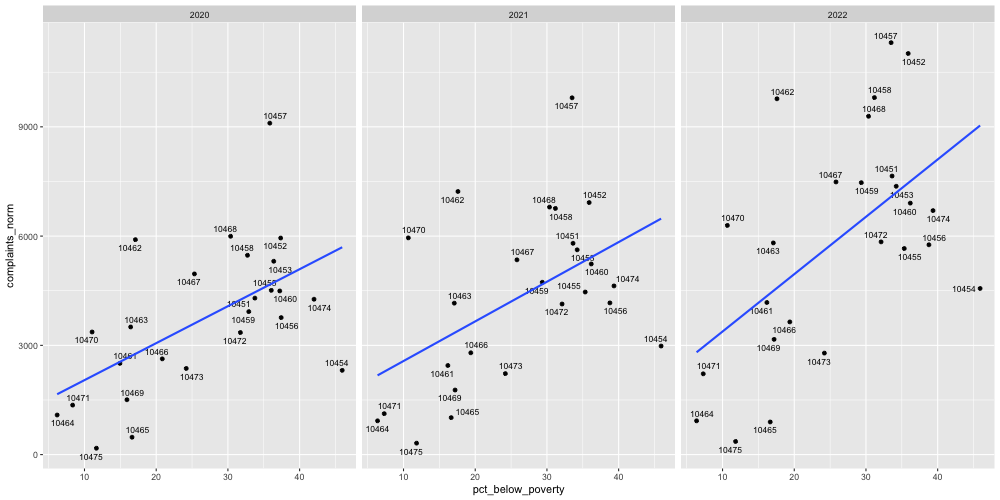

In [34]:
%%R -i df -w 1000 -h 500

df %>%
    filter(borough == 'BRONX') %>%
    ggplot(aes(x = pct_below_poverty, y = complaints_norm)) +
    # label points with zip code
    geom_text_repel(aes(label = zip), size = 3) +
    facet_wrap(~year) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE)

In [36]:
%%R -i df

df_bronx <- df %>%
    filter(borough=='BRONX')

model <- lm(complaints_norm ~ pct_below_poverty, data=df_bronx)
summary(model)


Call:
lm(formula = complaints_norm ~ pct_below_poverty, data = df_bronx)

Residuals:
    Min      1Q  Median      3Q     Max 
-4716.0 -1566.9  -394.7  1078.6  6163.0 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1484.83     689.66   2.153   0.0346 *  
pct_below_poverty   120.70      24.43   4.942 4.77e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2325 on 73 degrees of freedom
Multiple R-squared:  0.2507,	Adjusted R-squared:  0.2404 
F-statistic: 24.42 on 1 and 73 DF,  p-value: 4.771e-06



`geom_smooth()` using formula = 'y ~ x'


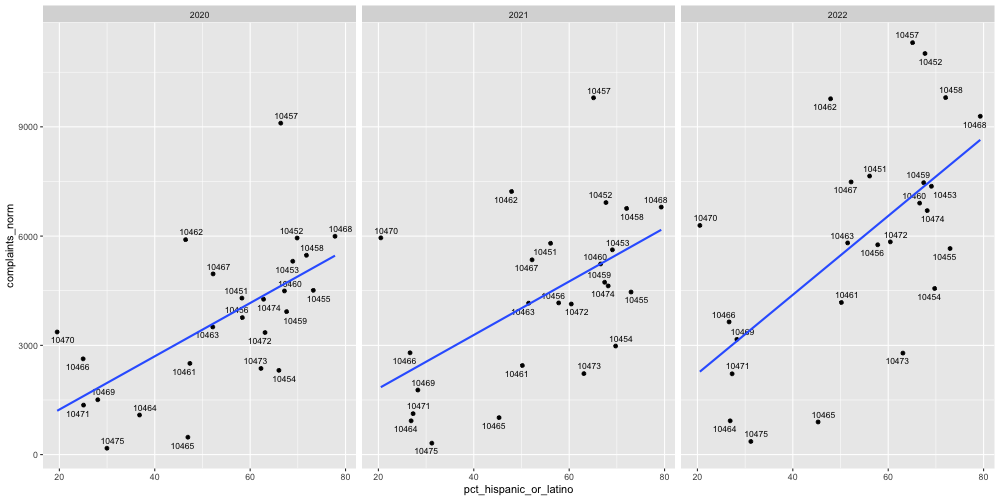

In [37]:
%%R -i df -w 1000 -h 500

df %>%
    filter(borough == 'BRONX') %>%
    ggplot(aes(x = pct_hispanic_or_latino, y = complaints_norm)) +
    # label points with zip code
    geom_text_repel(aes(label = zip), size = 3) +
    facet_wrap(~year) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE)

In [38]:
%%R -i df

df_bronx <- df %>%
    filter(borough=='BRONX')

model <- lm(complaints_norm ~ pct_hispanic_or_latino, data=df_bronx)
summary(model)


Call:
lm(formula = complaints_norm ~ pct_hispanic_or_latino, data = df_bronx)

Residuals:
    Min      1Q  Median      3Q     Max 
-3568.9 -1417.0  -601.9  1147.4  5719.0 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)               51.59     850.90   0.061    0.952    
pct_hispanic_or_latino    85.09      15.08   5.641 3.02e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2242 on 73 degrees of freedom
Multiple R-squared:  0.3036,	Adjusted R-squared:  0.294 
F-statistic: 31.82 on 1 and 73 DF,  p-value: 3.02e-07



In [42]:
%%R -i df

df_bronx <- df %>%
    filter(borough=='BRONX')

model <- lm(complaints_norm ~ pct_hispanic_or_latino + median_income, data=df_bronx)
summary(model)


Call:
lm(formula = complaints_norm ~ pct_hispanic_or_latino + median_income, 
    data = df_bronx)

Residuals:
    Min      1Q  Median      3Q     Max 
-3794.9 -1508.2  -281.3   942.7  5744.9 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)  
(Intercept)            3352.02366 2170.12610   1.545   0.1268  
pct_hispanic_or_latino   52.90207   24.55691   2.154   0.0346 *
median_income            -0.03153    0.01911  -1.650   0.1033  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2216 on 72 degrees of freedom
Multiple R-squared:  0.329,	Adjusted R-squared:  0.3103 
F-statistic: 17.65 on 2 and 72 DF,  p-value: 5.796e-07



While the model is slightly improving after looking at median_income and pct_below_poverty, it is still not a good model since the p-value of median_income is large. (The same was observed in other combinations, including all three together). From what is seems, pct_hispanic_or_latino is a better predictor of complaints_norm. 

Methodological choice alert: I am interested in zip code 10457 (which is in the Bronx) since I have been working with this data for a while now and I know that this zip code is a major outlier (which is caused by a single address 2176 Tibeout Avenue). I have visited that address and I noticed that most residents were hispanic. Plotting the data confirms what I assumed - the zip code has a high percentage of hispanic people. 

I'm curious of the observation if we look at pct_black_or_african_american. Let's check!


`geom_smooth()` using formula = 'y ~ x'


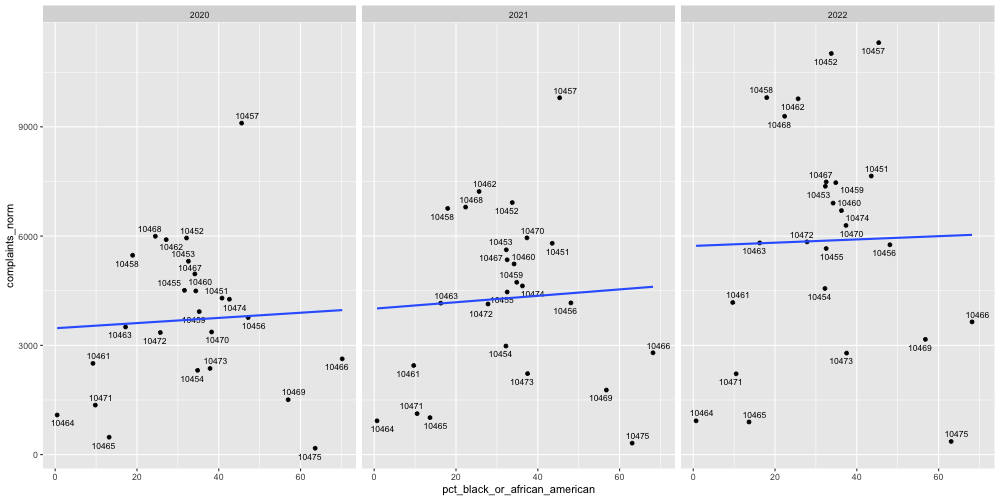

In [43]:
%%R -i df -w 1000 -h 500

df %>%
    filter(borough == 'BRONX') %>%
    ggplot(aes(x = pct_black_or_african_american, y = complaints_norm)) +
    # label points with zip code
    geom_text_repel(aes(label = zip), size = 3) +
    facet_wrap(~year) +
    geom_point() +
    geom_smooth(method = "lm", se = FALSE)

In [44]:
%%R -i df

df_bronx <- df %>%
    filter(borough=='BRONX')

model <- lm(complaints_norm ~ pct_black_or_african_american, data=df_bronx)
summary(model)


Call:
lm(formula = complaints_norm ~ pct_black_or_african_american, 
    data = df_bronx)

Residuals:
    Min      1Q  Median      3Q     Max 
-4642.9 -2041.8  -140.9  1374.2  6607.3 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   4419.368    700.741   6.307 1.95e-08 ***
pct_black_or_african_american    6.269     19.239   0.326    0.745    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2684 on 73 degrees of freedom
Multiple R-squared:  0.001453,	Adjusted R-squared:  -0.01223 
F-statistic: 0.1062 on 1 and 73 DF,  p-value: 0.7454



Okay this is good. From the zip code level, hispanic population is a better predictor of complaints_norm than black population. However, 10457 also seems to have a high black population. We need to look at the block level data to narrow the analysis.

Side note: I am trying to get block data but the censusgeocode is taking hours to fetch the data. I will update this notebook when I get the data.

Overall inference: pct_hispanic_or_latino is the best predictor of complaints_norm in Bronx zip codes.